# BIGDATA ANLYSIS<br>
## using a data set from url <br>
## PROJECT- PARKINSON'S DESISEAS

In [1]:
%pip install pandas ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

FETCHING A DATASET

In [3]:
parkinsons_telemonitoring = fetch_ucirepo(id=189)
X = parkinsons_telemonitoring.data.features
y = parkinsons_telemonitoring.data.targets
url = 'https://archive.ics.uci.edu/static/public/189/data.csv'
df = pd.read_csv(url)
df.head()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,28.199,34.398
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,28.447,34.894
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,28.695,35.389
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,28.905,35.810
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,29.187,36.375


# Data Exploration

The dataset at hand provides valuable telemonitoring information for individuals diagnosed with Parkinson's disease. Each row in the dataset represents a specific test conducted on a patient, offering a comprehensive set of features that contribute to understanding the patient's condition. These features include demographic information such as age and sex, temporal aspects like test time, and a range of acoustic measures that reflect the patient's vocal characteristics.

In essence, this dataset is a rich collection of observations capturing the nuances of Parkinson's disease progression over time. The acoustic measures, including but not limited to Jitter, Shimmer, and various other related features, provide insights into the subtle changes in vocal patterns associated with Parkinson's disease.

The primary objective of leveraging this dataset is to gain a deeper understanding of the disease dynamics and its manifestation in vocal behavior. By analyzing the recorded telemonitoring data, researchers and healthcare professionals can potentially identify patterns, trends, and key markers indicative of the disease's progression.

This dataset is a valuable resource for developing models and analytical approaches aimed at predicting or assessing Parkinson's disease severity based on the acoustic features extracted from telemonitoring tests. Through comprehensive exploration and analysis, the intention is to unearth meaningful correlations between the provided features and the severity of motor-related symptoms, as indicated by the 'motor_UPDRS' and 'total_UPDRS' target variables.

The overarching goal is to make contributions to the broader discipline of Parkinson's disorder research, assisting within the improvement of extra powerful diagnostic gear and personalized remedy plans. The insights derived from this dataset may additionally pave the way for improvements in telemonitoring technology and the early detection of Parkinson's sickness, in the end enhancing the great care provided to affected people.

In [4]:
# Display general information about the dataset
print("Dataset Information:")
print("---------------------")
print(f"Number of Instances: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Values:")
print(df.nunique())
print("\nSummary Statistics:")
print(df.describe())

# Display information about the target variable (assuming 'y' is your target variable)
print("\nTarget Variable Information:")
print("-----------------------------")
print(f"Number of Unique Classes: {y.nunique()}")
print("\nClass Distribution:")
print(y.value_counts())


Dataset Information:
---------------------
Number of Instances: 5875
Number of Features: 22

Data Types:
subject#           int64
age                int64
sex                int64
test_time        float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
motor_UPDRS      float64
total_UPDRS      float64
dtype: object

Missing Values:
subject#         0
age              0
sex              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR       

# Imputation function

In [5]:
def impute_missing_values(data):
    """
    Impute missing values using mean imputation.

    Parameters:
    - data: Pandas DataFrame

    Returns:
    - imputed_data: Pandas DataFrame
    """
    # Check for missing values
    missing_values = data.isnull().sum()

    # If there are missing values, perform mean imputation
    if missing_values.any():
        imputed_data = data.fillna(data.mean())
        print("Imputation: Missing values were imputed using mean values.")
        return imputed_data
    else:
        print("Imputation: No missing values found. Dataset is complete.")
        return data

# Apply the imputation function to our dataset
df_imputed = impute_missing_values(df)

# Check the result
print("Imputed Dataset Information:")
print("-----------------------------")
print(f"Number of Instances: {df_imputed.shape[0]}")
print(f"Number of Features: {df_imputed.shape[1]}")
print("\nMissing Values After Imputation:")
print(df_imputed.isnull().sum())

Imputation: No missing values found. Dataset is complete.
Imputed Dataset Information:
-----------------------------
Number of Instances: 5875
Number of Features: 22

Missing Values After Imputation:
subject#         0
age              0
sex              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
motor_UPDRS      0
total_UPDRS      0
dtype: int64


# Descriptive Statistics

In [6]:
# Select the most relevant feature (change this to your specific feature)
relevant_feature = 'test_time'

# Descriptive Statistics for the most relevant feature
relevant_feature_stats = df_imputed[relevant_feature].describe()

# Calculate Mode separately as it may have multiple values
mode_values = df_imputed[relevant_feature].mode()

# Calculate Range
feature_range = df_imputed[relevant_feature].max() - df_imputed[relevant_feature].min()

# Calculate Variance and Standard Deviation
feature_variance = df_imputed[relevant_feature].var()
feature_std_dev = df_imputed[relevant_feature].std()

# Calculate Quartiles
q1 = df_imputed[relevant_feature].quantile(0.25)
q2 = df_imputed[relevant_feature].quantile(0.5)
q3 = df_imputed[relevant_feature].quantile(0.75)

# Display Descriptive Statistics
print(f"\nDescriptive Statistics for '{relevant_feature}':")
print(f"Minimum: {relevant_feature_stats['min']}")
print(f"Maximum: {relevant_feature_stats['max']}")
print(f"Mean: {relevant_feature_stats['mean']}")
print(f"Median: {relevant_feature_stats['50%']}")  # 50% corresponds to the median
print(f"Mode: {mode_values.to_list()}")
print(f"Range: {feature_range}")
print(f"Variance: {feature_variance}")
print(f"Standard Deviation: {feature_std_dev}")
print(f"1st Quartile (Q1): {q1}")
print(f"2nd Quartile (Q2 or Median): {q2}")
print(f"3rd Quartile (Q3): {q3}")



Descriptive Statistics for 'test_time':
Minimum: -4.2625
Maximum: 215.49
Mean: 92.86372204595745
Median: 91.523
Mode: [119.34]
Range: 219.7525
Variance: 2856.43238179434
Standard Deviation: 53.44560208094151
1st Quartile (Q1): 46.8475
2nd Quartile (Q2 or Median): 91.523
3rd Quartile (Q3): 138.445


# Frequency distribution

In [7]:
# Frequency distribution
test_time_bins = pd.cut(df['test_time'], bins=10)
frequency_distribution = test_time_bins.value_counts().sort_index()
print(frequency_distribution)

test_time
(-4.482, 17.713]      476
(17.713, 39.688]      745
(39.688, 61.663]      794
(61.663, 83.638]      699
(83.638, 105.614]     645
(105.614, 127.589]    716
(127.589, 149.564]    718
(149.564, 171.54]     693
(171.54, 193.515]     305
(193.515, 215.49]      84
Name: count, dtype: int64


# Mean of Frequency distribution

In [8]:
# Mean of Frequency distribution
mean_frequency = frequency_distribution.mean()
print(f"Mean of Frequency Distribution: {mean_frequency}")

Mean of Frequency Distribution: 587.5


# Data Shaping
## Task 1 Methodology and Code

In [9]:
import pandas as pd
import numpy as np
# Define the number of additional instances to generate
additional_instances = 2000

# Get the range of 'test_time' values in the original dataset
min_test_time = df_imputed['test_time'].min()
max_test_time = df_imputed['test_time'].max()

# Initialize an empty list to store the additional instances
additional_data_list = []

for _ in range(additional_instances):
    # Randomly sample 'test_time' within the range of the original data
    new_test_time = np.random.uniform(min_test_time, max_test_time)

    # Create a new row with similar patterns for other features
    new_instance = df_imputed.iloc[0].copy() # Assuming the first row as a template
    new_instance['test_time'] = new_test_time

    # Append the new instance to the list of additional data
    additional_data_list.append(new_instance)

# Convert the list of additional instances into a DataFrame
additional_data = pd.DataFrame(additional_data_list)

# Display the generated additional data
print("\nGenerated Additional Instances:")
print(additional_data.head())


Generated Additional Instances:
   subject#   age  sex  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
0       1.0  72.0  0.0  34.326287    0.00662     0.000034     0.00401   
0       1.0  72.0  0.0   6.245872    0.00662     0.000034     0.00401   
0       1.0  72.0  0.0  44.915217    0.00662     0.000034     0.00401   
0       1.0  72.0  0.0  80.356585    0.00662     0.000034     0.00401   
0       1.0  72.0  0.0  22.768267    0.00662     0.000034     0.00401   

   Jitter:PPQ5  Jitter:DDP  Shimmer  ...  Shimmer:APQ5  Shimmer:APQ11  \
0      0.00317     0.01204  0.02565  ...       0.01309        0.01662   
0      0.00317     0.01204  0.02565  ...       0.01309        0.01662   
0      0.00317     0.01204  0.02565  ...       0.01309        0.01662   
0      0.00317     0.01204  0.02565  ...       0.01309        0.01662   
0      0.00317     0.01204  0.02565  ...       0.01309        0.01662   

   Shimmer:DDA      NHR    HNR     RPDE      DFA      PPE  motor_UPDRS  \
0      0.04314 

In [11]:
# Database Schema

Assuming a simplified schema for the Parkinson's disease dataset: Entities: Patients: PatientID (Primary Key), Age, Sex Tests: TestID (Primary Key), PatientID (Foreign Key), TestTime, JitterPercent, Shimmer, ... (other test-related features)

In this representation Below:

PatientID in the Patients table is the primary key (PK). PatientID in the Tests table is a foreign key (FK) referencing the PatientID in the Patients table.

Relationships
Patients (PatientID) -----< Tests (PatientID)

Patients (PatientID) -----< Doctors (PatientID)

### ER Diagram

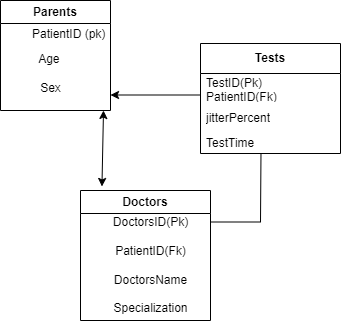

In [12]:

# Data Sampling
## Task 1 Sampling Function

In [13]:
def sample_data(criteria, sample_size=2000):
    sampled_data = df[df['age'].between(criteria[0], criteria[1])].sample(n=sample_size, random_state=42)
    return sample_data

Split dataset into 4 samples

In [14]:
sample_size_2 = min(200, len(df_imputed[df_imputed['age'].between(60, 70)]))
sample2 = sample_data((60, 70), sample_size=sample_size_2)

sample_size_3 = min(200, len(df_imputed[df_imputed['age'].between(70, 80)]))
sample3 = sample_data((70, 80), sample_size=sample_size_3)

sample_size_4 = min(200, len(df_imputed[df_imputed['age'].between(80, 90)]))
sample4 = sample_data((80, 90), sample_size=sample_size_4)

# Display the adjusted sample sizes
print(f"\nAdjusted Sample Sizes:")
print(f"Sample 2 Size: {sample_size_2}")
print(f"Sample 3 Size: {sample_size_3}")
print(f"Sample 4 Size: {sample_size_4}")


Adjusted Sample Sizes:
Sample 2 Size: 200
Sample 3 Size: 200
Sample 4 Size: 142


# Descriptive Statistics for each sample

In [37]:
# Task 3 Descriptive Statistics for each sample

# Define a function to calculate descriptive statistics for a given sample
def calculate_sample_statistics(sample, sample_name):
    stats = sample.describe()
    mode_values = sample.mode()
    range_val = sample.max() - sample.min()
    variance_val = sample.var()
    std_dev_val = sample.std()
    q1_val = sample.quantile(0.25)
    q2_val = sample.quantile(0.5)
    q3_val = sample.quantile(0.75)

    print(f"\nDescriptive Statistics for {sample_name}:")
    print(f"Minimum: {stats['min']}")
    print(f"Maximum: {stats['max']}")
    print(f"Mean: {stats['mean']}")
    print(f"Median: {stats['50%']}")  # 50% corresponds to the median
    print(f"Mode: {mode_values.to_list()}")
    print(f"Range: {range_val}")
    print(f"Variance: {variance_val}")
    print(f"Standard Deviation: {std_dev_val}")
    print(f"1st Quartile (Q1): {q1_val}")
    print(f"2nd Quartile (Q2 or Median): {q2_val}")
    print(f"3rd Quartile (Q3): {q3_val}")

# Calculate descriptive statistics for each sample
calculate_sample_statistics(sample2['test_time'], 'Sample 2')
calculate_sample_statistics(sample3['Shimmer'], 'Sample 3')
calculate_sample_statistics(sample4['total_UPDRS'], 'Sample 4')


TypeError: 'function' object is not subscriptable

# Database Connection Code & Database Schema Diagram

In [35]:
import mysql.connector


class Database:
    def __init__(self, host, port, user, password, database):
        self.connection = mysql.connector.connect(
            host=host,
            port=port,
            user=user,
            password=password,
            database=database
        )
        self.cursor = self.connection.cursor()

    def create_tables(self):
        # Create Patient table
        self.cursor.execute("""
        CREATE TABLE IF NOT EXISTS Patient (
            paid INT PRIMARY KEY,
            age INT,
            sex VARCHAR(10)
        )
        """)

        # Create Doctor table
        self.cursor.execute("""
        CREATE TABLE IF NOT EXISTS Doctor (
            doid INT PRIMARY KEY,
            paid INT,
            name VARCHAR(255),
            FOREIGN KEY (paid) REFERENCES Patient(paid)
        )
        """)

        # Create Test table
        self.cursor.execute("""
        CREATE TABLE IF NOT EXISTS Test (
            teid INT PRIMARY KEY,
            paid INT,
            doid INT,
            jitter_percent INT,
            test_time DATETIME,
            FOREIGN KEY (paid) REFERENCES Patient(paid),
            FOREIGN KEY (doid) REFERENCES Doctor(doid)
        )
        """)

        self.connection.commit()

    def insert_data(self, table, data):
        columns = ', '.join(data.keys())
        values = ', '.join(['%s'] * len(data))
        query = f"INSERT INTO {table} ({columns}) VALUES ({values})"
        self.cursor.execute(query, tuple(data.values()))
        self.connection.commit()

    def read_data(self, table, primary_key):
        query = f"SELECT * FROM {table} WHERE {table[:-1]}id = %s"
        self.cursor.execute(query, (primary_key,))
        return self.cursor.fetchone()

    def update_data(self, table, primary_key, data):
        set_clause = ', '.join([f"{key} = %s" for key in data.keys()])
        query = f"UPDATE {table} SET {set_clause} WHERE {table[:-1]}id = %s"
        self.cursor.execute(query, tuple(data.values()) + (primary_key,))
        self.connection.commit()

    def delete_data(self, table, primary_key):
        query = f"DELETE FROM {table} WHERE {table[:-1]}id = %s"
        self.cursor.execute(query, (primary_key,))
        self.connection.commit()

    def _del_(self):
        self.cursor.close()
        self.connection.close()


class Patient:
    def __init__(self, paid, age, sex):
        self.paid = paid
        self.age = age
        self.sex = sex


class Doctor:
    def __init__(self, doid, paid, name):
        self.doid = doid
        self.paid = paid
        self.name = name


class Test:
    def __init__(self, teid, paid, doid, jitter_percent, test_time):
        self.teid = teid
        self.paid = paid
        self.doid = doid
        self.jitter_percent = jitter_percent
        self.test_time = test_time


# Connect to MySQL database (replace with your XAMPP settings)
db = Database(
            host="localhost",
            port=3306,
            user="root",
            password="",
            database="hospital"
)
db.create_tables()

# # Insert data into Patient table
# Patient_data = {'paid': 1, 'age': 30, 'sex': 'Male'}
# db.insert_data('Patient', Patient_data)

# # Insert data into Doctor table
# doctor_data = {'doid': 1, 'paid': 1, 'name': 'Dr. Smith'}
# db.insert_data('Doctor', doctor_data)

# # Insert data into Test table
# test_data = {'teid': 1, 'paid': 1, 'doid': 1, 'jitter_percent': 5, 'test_time': '2023-11-23 12:00:00'}
# db.insert_data('Test', test_data)

# # Read data from Patient table
# Patient_record = db.read_data('Patient', 1)
# print("Patient Record:", Patient_record)

# # Update data in Doctor table
# updated_doctor_data = {'paid': 2, 'name': 'Dr. Johnson'}
# db.update_data('Doctor', 1, updated_doctor_data)

# Read updated data from Doctor table
# updated_doctor_record = db.read_data('Doctor', 1)
# print("Updated Doctor Record:", updated_doctor_record)

# # Delete data from Test table
# db.delete_data('Test', 1)
# deleted_test_record = db.read_data('Test', 1)
# print("Deleted Test Record:", deleted_test_record)

DatabaseError: 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)

In [21]:
# Assuming you have loaded the dataset and named it 'df'
# Display general information about the dataset
print("Dataset Information:")
print("---------------------")
print(f"Number of Instances: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Values:")
print(df.nunique())

Dataset Information:
---------------------
Number of Instances: 5875
Number of Features: 22

Data Types:
subject#           int64
age                int64
sex                int64
test_time        float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
motor_UPDRS      float64
total_UPDRS      float64
dtype: object

Missing Values:
subject#         0
age              0
sex              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR       

In [22]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          subject#          age          sex    test_time    Jitter(%)  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722     0.006154   
std      12.372279     8.821524     0.465656    53.445602     0.005624   
min       1.000000    36.000000     0.000000    -4.262500     0.000830   
25%      10.000000    58.000000     0.000000    46.847500     0.003580   
50%      22.000000    65.000000     0.000000    91.523000     0.004900   
75%      33.000000    72.000000     1.000000   138.445000     0.006800   
max      42.000000    85.000000     1.000000   215.490000     0.099990   

       Jitter(Abs)   Jitter:RAP  Jitter:PPQ5   Jitter:DDP      Shimmer  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean      0.000044     0.002987     0.003277     0.008962     0.034035  ...   
std       0.000036     0.003124     0.003732     0.009371     0.025835  ...